### Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


# tienda1 = pd.read_csv('data/tienda_1.csv')
# tienda2 = pd.read_csv('data/tienda_2.csv')
# tienda3 = pd.read_csv('data/tienda_3.csv')
# tienda4 = pd.read_csv('data/tienda_4.csv')

tienda1.head(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [2]:
# Obtenemos el ingreso de las ventas de cada sucursal
sucursales_df = [tienda1,tienda2,tienda3,tienda4]
ingreso_ventas = np.array([np.sum(fact['Precio']) for fact in sucursales_df])
ingreso_ventas /= 1000000  # Dividimos entre 1 millon, para tener los valores en millones 
print(ingreso_ventas)

# Comparamos con el valor total que paga el cliente sumando el costo de envio
ingreso_total = np.array([(np.sum(fact['Precio']) + np.sum(fact['Costo de envío'])) for fact in sucursales_df])
ingreso_total /= 1000000  # Dividimos entre 1 millon, para tener los valores en millones 

print(ingreso_total)

[1150.8804 1116.3435 1098.0196 1038.3757]
[1212.2583 1175.8286 1156.5362 1093.6931]


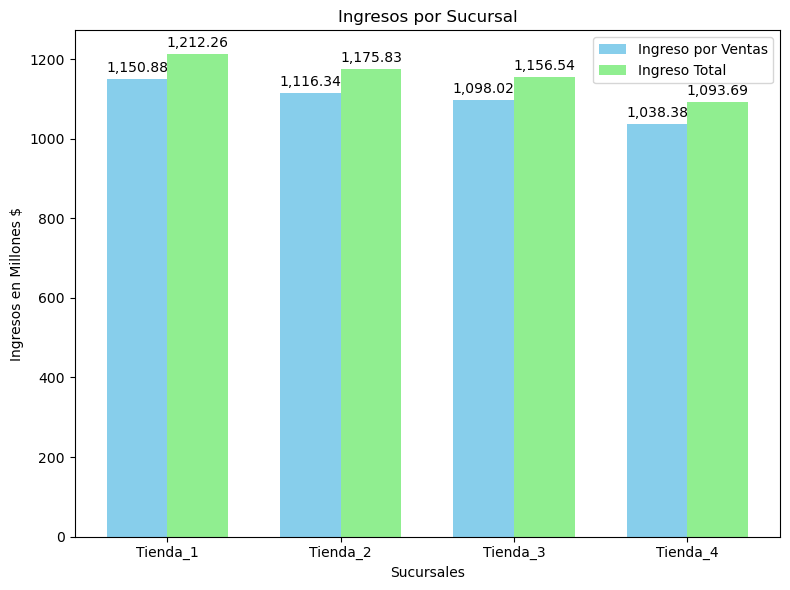

In [3]:
# Datos
sucursales = ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']

# Manejo de espacios y tamaño de grafica
x = np.arange(len(sucursales)) # Posiciones para las tiendas
ancho =.35
fig, ax = plt.subplots(figsize=(8,6))

# Barras
ax.bar(x-(ancho/2),ingreso_ventas,width=ancho,label='Ingreso por Ventas', color='skyblue')
ax.bar(x+(ancho/2),ingreso_total,width=ancho,label='Ingreso Total',color='lightgreen')

# Etiquetas y títulos
ax.set_xlabel('Sucursales')
ax.set_ylabel('Ingresos en Millones $')
ax.set_title('Ingresos por Sucursal')
ax.set_xticks(x)
ax.set_xticklabels(sucursales)
ax.legend()

for i in range(len(sucursales)):
    ax.text(x[i] - ancho/2, ingreso_ventas[i] + 10, f'{ingreso_ventas[i]:,.2f}', ha='center', va='bottom')
    ax.text(x[i] + ancho/2, ingreso_total[i] + 10, f'{ingreso_total[i]:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




>Podemos visualizar que no existe diferencia entre los ingresos de solo las ventas en contraste con los ingreso totales que inclue el pago por envio a domicilio.

>Tambien podemos ver que la sucursal que menos ingresos nos da es la ***Tienda 4*** mientras que la sucursal que mas factura es la ***Tienda 1***


# 2. Ventas por categoría

In [63]:
for i in range(len(sucursales_df)):
    sucursales_df[i]['Sucursal'] = f'Tienda_{i+1}' # Se añade una columna a cada dataframe indicando de que sucurlsal es la operación

df_completo = pd.concat([*sucursales_df], ignore_index=True) # Unimos los dataframe de cada tienda en uno solo

display(df_completo) # Verificamos la tabla creada

ventas_categoria = pd.pivot_table(df_completo,index='Categoría del Producto',columns='Sucursal',values='Precio',aggfunc='sum') # Creamos una tabla dinamica (pivot table) con los totales de ventas por categoria para cada tienda
ventas_categoria_mostrar = ventas_categoria.map(lambda x: f'{x:,.0f}') # Damos formato a los valores
display(ventas_categoria_mostrar) # Mostramos la pivot table

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Sucursal
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda_4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda_4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda_4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda_4


Sucursal,Tienda_1,Tienda_2,Tienda_3,Tienda_4
Categoría del Producto,,,,
Artículos para el hogar,"12,698,400","14,746,900","15,060,000","15,074,500"
Deportes y diversión,"39,290,000","34,744,500","35,593,100","33,350,100"
Electrodomésticos,"363,685,200","348,567,800","329,237,900","283,260,200"
Electrónicos,"429,493,500","410,831,100","410,775,800","409,476,100"
Instrumentos musicales,"91,299,000","104,990,300","77,380,900","75,102,400"
Juguetes,"17,995,700","15,945,400","19,401,100","20,262,200"
Libros,"8,784,900","10,091,200","9,498,700","9,321,300"
Muebles,"187,633,700","176,426,300","201,072,100","192,528,900"


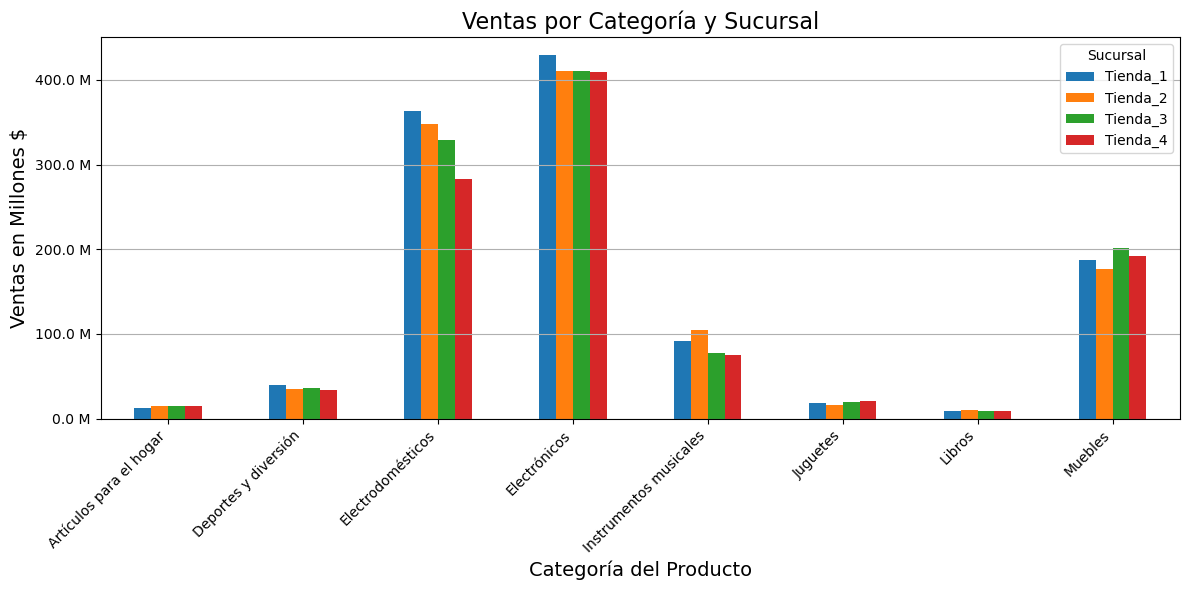

In [65]:
ventas_categoria.plot(kind='bar', figsize=(12,6))

plt.title('Ventas por Categoría y Sucursal', fontsize=16)
plt.xlabel('Categoría del Producto',fontsize=14)
plt.ylabel('Ventas en Millones $',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*1e-6:.1f} M'))

plt.tight_layout()
plt.show()



Sucursal,Tienda_1,Tienda_2,Tienda_3,Tienda_4
Categoría del Producto,,,,
Artículos para el hogar,12.6984,14.7469,15.0600,15.0745
Deportes y diversión,39.2900,34.7445,35.5931,33.3501
Electrodomésticos,363.6852,348.5678,329.2379,283.2602
Electrónicos,429.4935,410.8311,410.7758,409.4761
Instrumentos musicales,91.2990,104.9903,77.3809,75.1024
Juguetes,17.9957,15.9454,19.4011,20.2622
Libros,8.7849,10.0912,9.4987,9.3213
Muebles,187.6337,176.4263,201.0721,192.5289


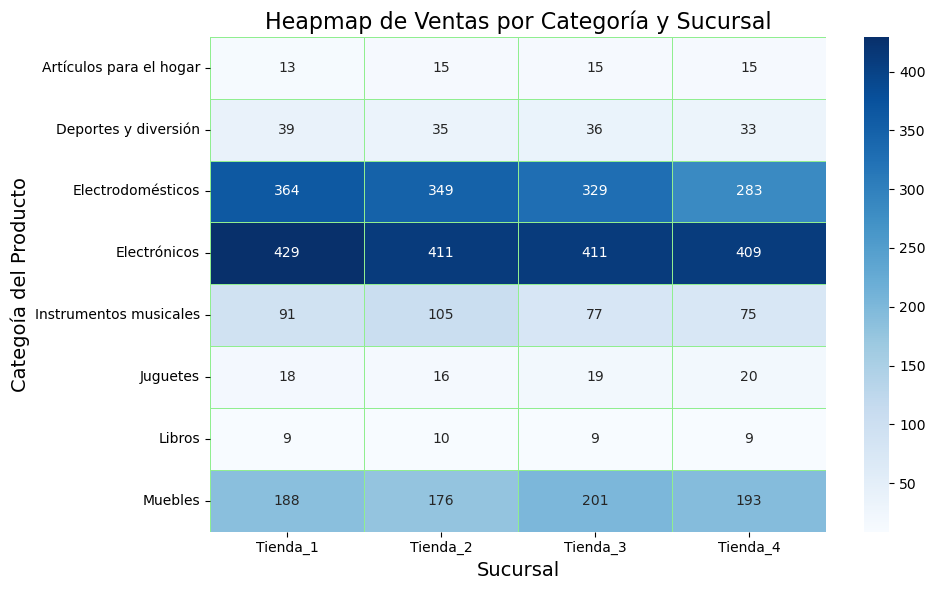

In [91]:
ventas_categoria_millones = ventas_categoria/1000000
display(ventas_categoria_millones)
plt.figure(figsize=(10,6))

sns.heatmap(ventas_categoria_millones,annot=True,fmt=',.0f',cmap='Blues',linewidths=.5,linecolor='lightgreen')

plt.title('Heapmap de Ventas por Categoría y Sucursal',fontsize=16)
plt.xlabel('Sucursal',fontsize=14)
plt.ylabel('Categoía del Producto',fontsize=14)

plt.tight_layout()
plt.show()


> Con este grafico podemos observar claramente como las categorias que se venden mas son ***Electrónicos, Electrodomésticos y Muebles*** mientras que ***Juguetes, Artículos para el hogar y Libros*** son las categorias menos vendidas tambien podemos reafirmar que la sucursal que vende mas es la numero ***tienda 1*** y en contraste la tienda que sale menor valorada es la ***tienda 4***

# 3. Calificación promedio de la tienda


In [121]:
df_completo

rate_promedio = pd.pivot_table(df_completo,index='Sucursal',values='Calificación',aggfunc='mean')
rate_promedio

,Calificación
Sucursal,
Tienda_1,3.976685
Tienda_2,4.037304
Tienda_3,4.048326
Tienda_4,3.995759


>Aqui podemos observar que la diferencia de calificacion de cada sucursal no es un factor determinante ya que la variacion es minima por apenas una decima 

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda